In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
import pandas as pd
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

In [5]:
import numpy as np
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

In [7]:
import statsmodels.api as sm
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

C:\Users\Lee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Residuals vs Predicted Values:

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

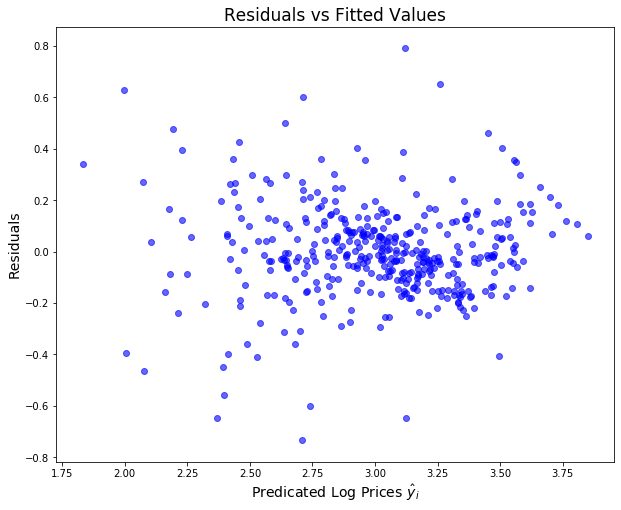

In [16]:
plt.figure(figsize=[10, 8]) # width, height

plt.title('Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicated Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6)
plt.show()

#### Distribution of Residuals using Log Prices (checking for normality):

<b>A normal distribution has a mean and skew of zero</b>

In [17]:
results.resid.mean()

-3.053662933077906e-15

In [21]:
round(results.resid.mean(), 3)

-0.0

In [20]:
results.resid.skew()

0.11775876201184944

In [24]:
round(results.resid.skew(),3)

0.118

In [25]:
resid_mean = round(results.resid.mean(), 3)

In [26]:
resid_mean

-0.0

In [27]:
resid_skew = round(results.resid.skew(),3)

In [29]:
resid_skew

0.118

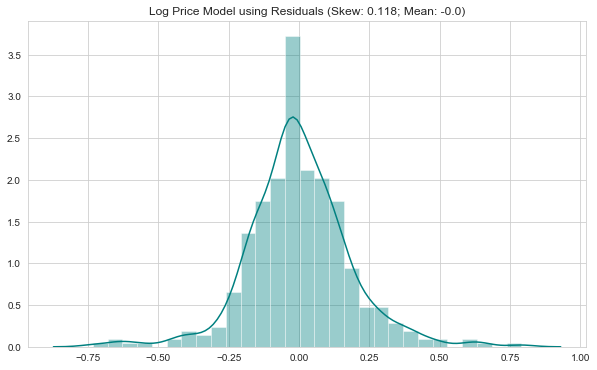

In [40]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.distplot(results.resid, color='teal')
plt.title(f'Log Price Model using Residuals (Skew: {resid_skew}; Mean: {resid_mean})')
plt.show()